# Heirarchical clustering

# Dataset

Dataset: Mall_Customers  
there is mall in specific city that contains information of its clients.
the clents that subscribe to the card. 
when client subscribe to the card,they provided their information like 
their gender,age,annual income. and because they have this card they use it to buy 
all sorts of things in the mall. and therefore the mall has to purchase 
history of each of its client member. according to history they obtained
the last column which is spending score.
spending score is a score that the amount computed for each of their clients and takes value between 1 and 100.


# Clustering

It is unsupervised learning method. Clusting is the task to divide 
the data points from population into groups.data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups.It is basically a collection of objects on the basis of similarity and dissimilarity between them.

In [1]:
#method of cluster analysis which seeks to build a hierarchy of clusters

In [2]:
# Importing the libraries
#numpy for mathematics
import numpy as np
#for plotting
import matplotlib.pyplot as plt
#import and manage datasets
import pandas as pd

In [3]:
#importing dataset using pandas
#Importing the dataset
#pd as a dataframe
dataset1 = pd.read_csv('Mall_Customers.csv')
dataset1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#aim:Find unknown clusters of clients
#3rd column:Annual Income 4th column:spending Score (1-100)
V = dataset1.iloc[:, [3, 4]].values

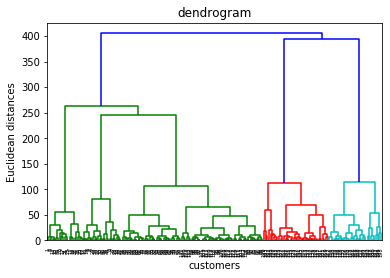

In [6]:
#using dendrogram to find optimal number of clusters
#import scipy is open source python library that contains tool to do 
#heirarchical clustering and building programs.
import scipy.cluster.hierarchy as sch
#create variable dendogram
#ward method tries to minimize the variance within each cluster
dendrogram = sch.dendrogram(sch.linkage(V, method = 'ward'))
plt.title('dendrogram')
plt.xlabel('customers')
plt.ylabel('Euclidean distances')
plt.show()

on x axis, all are customers and y axis, euclidean distances 
between clusters. plot represents all the diffrent clusters 
that were found during all the hierarchical clustering process

In [7]:
#fitting hierarchical clustering to the dataset1
#two types:
#1.agglomerated hierarchical clustering
#bottom up approach:each observation starts in its own cluster, 
#and pairs of clusters are merged as one moves up the hierarchy

#2.divisive hierarchical clustering
#top-down approach: all observations start in one cluster,
#and splits are performed recursively as one moves down the hierarchy

from sklearn.cluster import AgglomerativeClustering
#n_clusters: number of clusters
#affinity: distance between the linkage by euclidean distance
#ward: trying to minimize variance in each cluster
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean',linkage = 'ward')
y_hc = hc.fit_predict(V)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

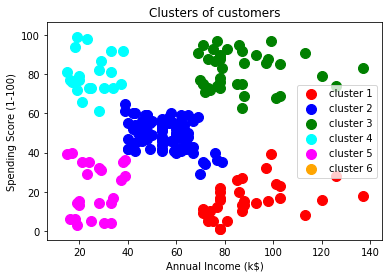

In [8]:
#visualizing the clusters
#visualizing the cluster
#x and y coordinate, size of data points, color

plt.scatter(V[y_hc == 0, 0], V[y_hc == 0, 1], s = 100, c = 'red',  label = 'cluster 1') 
plt.scatter(V[y_hc == 1, 0], V[y_hc == 1, 1], s = 100, c = 'blue',  label = 'cluster 2') 
plt.scatter(V[y_hc == 2, 0], V[y_hc == 2, 1], s = 100, c = 'green',  label = 'cluster 3') 
plt.scatter(V[y_hc == 3, 0], V[y_hc == 3, 1], s = 100, c = 'cyan',  label = 'cluster 4') 
plt.scatter(V[y_hc == 4, 0], V[y_hc == 4, 1], s = 100, c = 'magenta',  label = 'cluster 5')
plt.scatter(V[y_hc == 5, 0], V[y_hc == 5, 1], s = 100, c = 'orange',  label = 'cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()